![Iris](images/iris-machinelearning.png)

# Random-Decision-Forests

Basically, a random forests is an ensemble of decision trees.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. 

Thanks to their good classification performance, scalability, and ease of use, random forests have gained huge popularity in machine learning.

## Algorithm
The random forest algorithm can be summarized as following steps (ref: Python Machine Learning by Sebastian Raschka):

1. Draw a random *bootstrap* sample of size $n$ (randomly choose $n$ samples from the training set with replacement).
1. Grow a decision tree from the bootstrap sample. At each node:
  * Randomly select $d$ features without replacement.
  * Split the node using the feature that provides the best split according to the objective function, for instance, by maximizing the information gain.
1. Repeat the steps $1$ to $2k$ times.
1. Aggregate the prediction by each tree to assign the class label by **majority vote**.

Random forests don't provide the same level of interpretability as decision trees. However, a big advantage of random forests is that we don't have to worry so much about selecting good hyper-parameter values.

Because the ensemble model is quite robust and resistant to noise from the individual decision trees, we typically don't need to prune the random forest, and the only parameter we care about is the **number of trees $k$** (step 3).

The larger the number of trees, we get the better the performance of the random forest classifier at the cost of increased computations.

In the scikit-learn's **RandomForestClassifier** implementation, the sample size of the bootstrap sample is chosen to be equal to the number of samples in the original training set.

Note that by choosing a larger value for the sample size **$n$**, we decrease the randomness and thus the forest is more likely to overfit.

On the other hand, we can reduce the degree of overfitting by choosing smaller values for $n$ at the expense of the model performance.

For the number of features $d$ at each split, we want to choose a value that is smaller than the total number of features in the training set. $d = \sqrt(m)$ is used in scikit-learn, where $m$ is the number of features in the training set.

![DecisionRegions](images/scikit_machine_learning_Random_Decision_Forests.png)

From the picture, we can see the decision regions created by the ensemble of trees in the random forest.


We trained a random forest from 10 decision trees via the n_estimators parameter and used the entropy criterion as an impurity measure to split the nodes. Although we are growing a very small random forest from a very small training dataset, we used the n_jobs parameter for demonstration purposes, which allows us to parallelize the model training using 2 cores.

The code for the picture looks like this:

* criterion:
** "gini::  Gini impurity
** "entropy": Information gain
* n_estimators : Number of trees in forest. Default is 10.
* n_jobs: The number of jobs to run in parallel for both fit and predict.
* random_state: The seed used by the random number generator.

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X_iris = iris.data
y_targets = iris.target

feature_names = list(iris.feature_names)
target_names = list(iris.target_names)

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_targets, test_size=0.3, random_state=0)

print(np.shape(X_iris))
print(feature_names)
print(target_names)
print(X_iris[:5,:])

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [8]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                               n_estimators=10, random_state=1, n_jobs=2)

forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [4]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

print(X_combined[0:5, :])
print(y_combined[:5])

[[ 5.   2.   3.5  1. ]
 [ 6.5  3.   5.5  1.8]
 [ 6.7  3.3  5.7  2.5]
 [ 6.   2.2  5.   1.5]
 [ 6.7  2.5  5.8  1.8]]
[1 2 2 2 2]


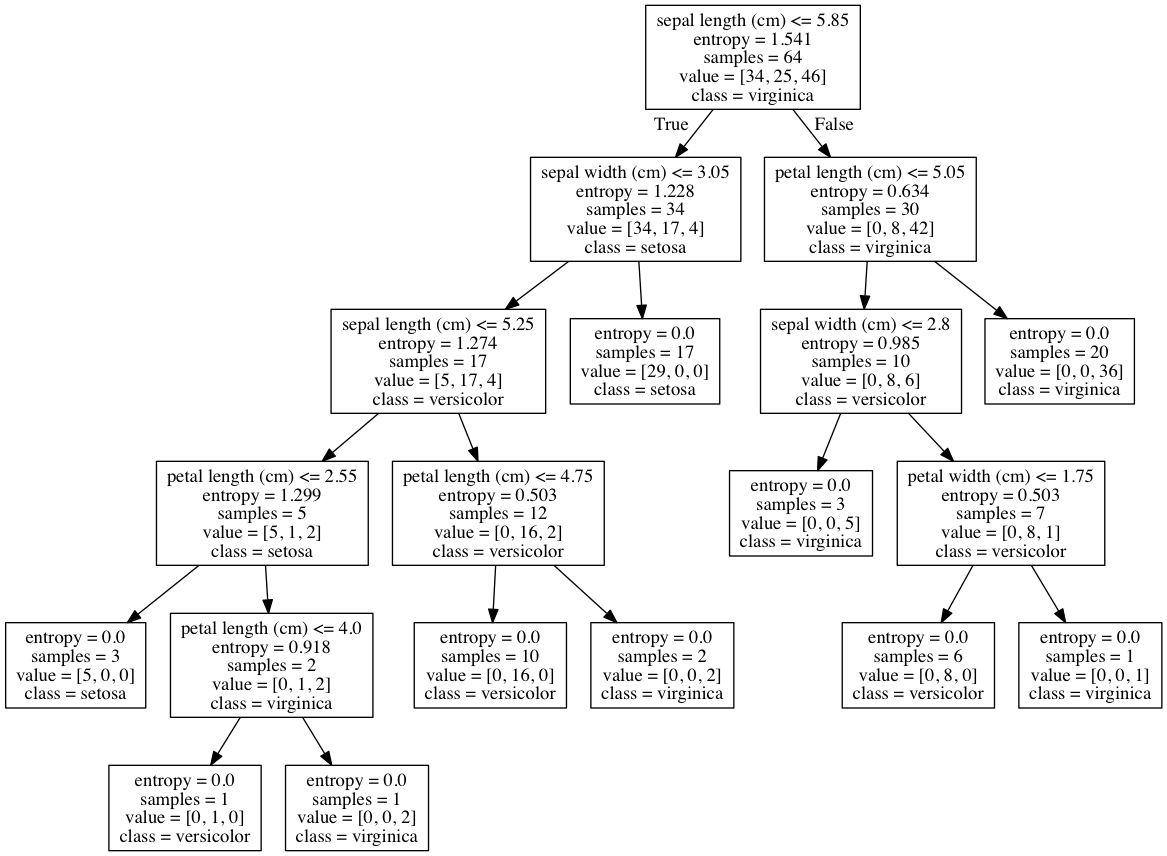

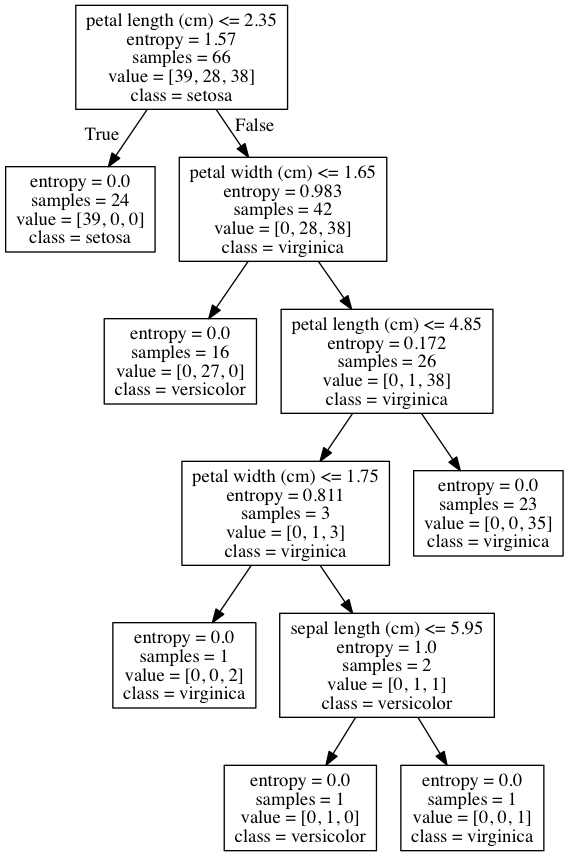

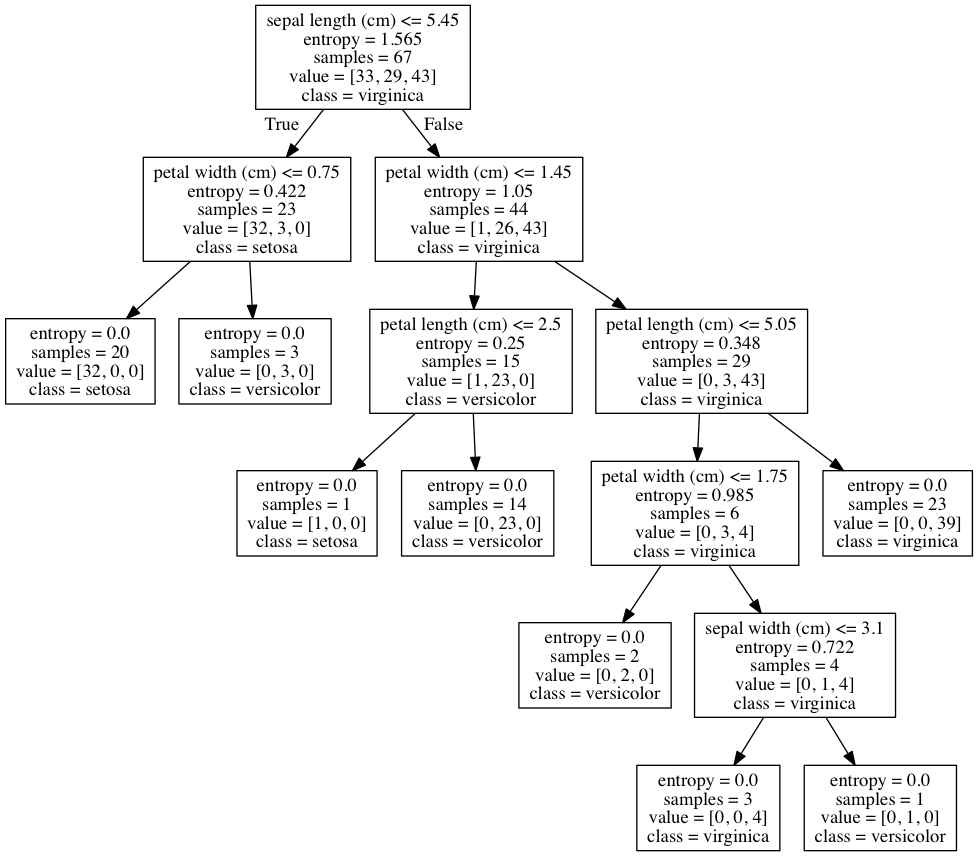

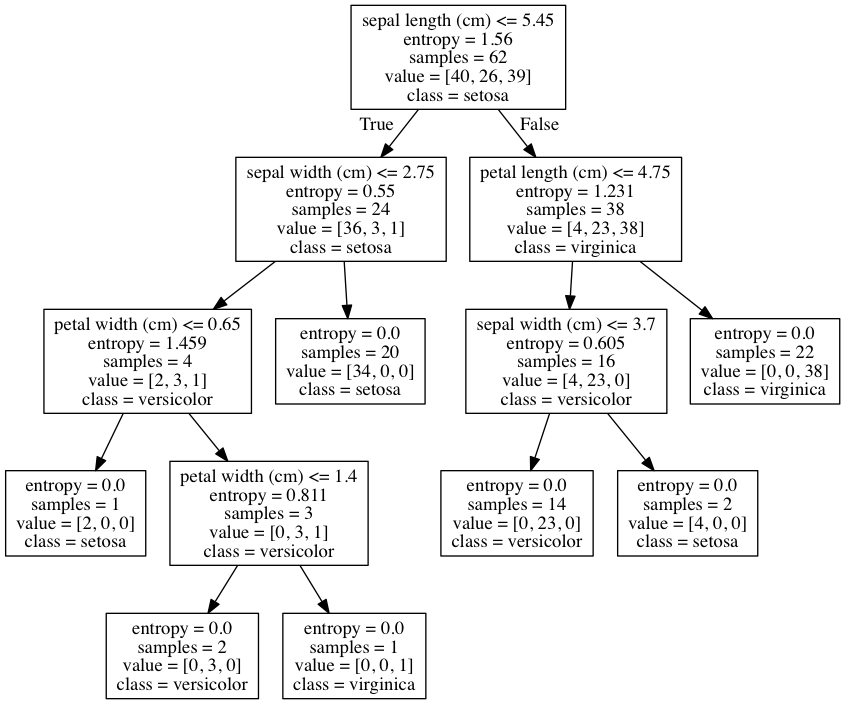

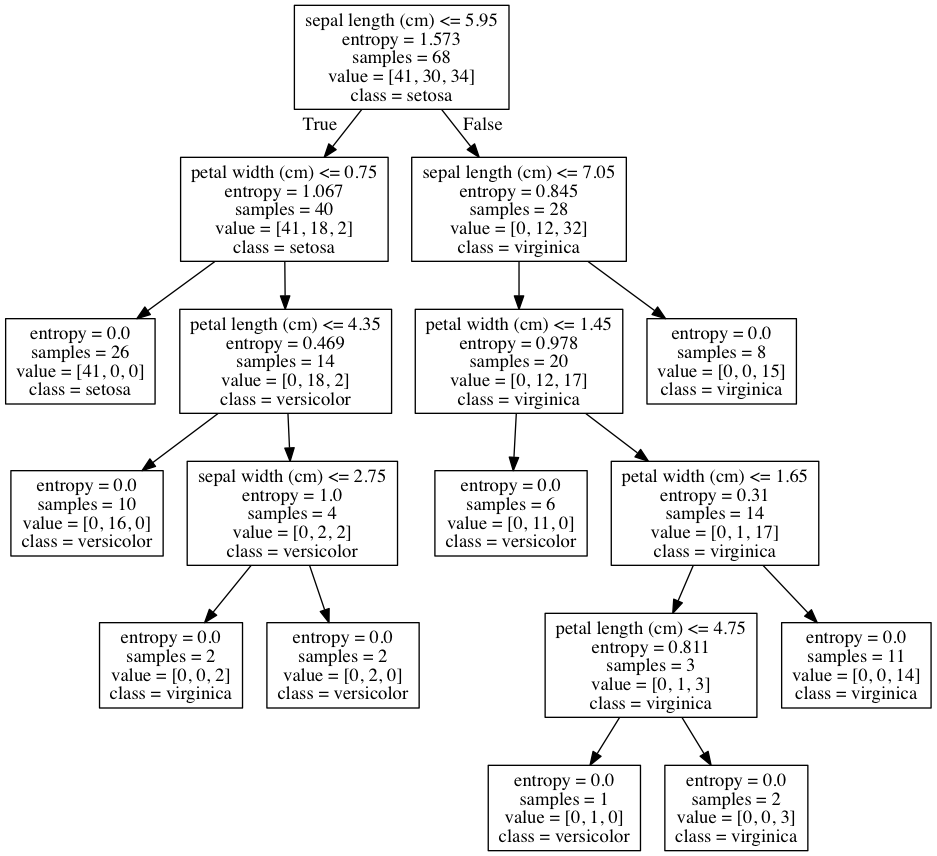

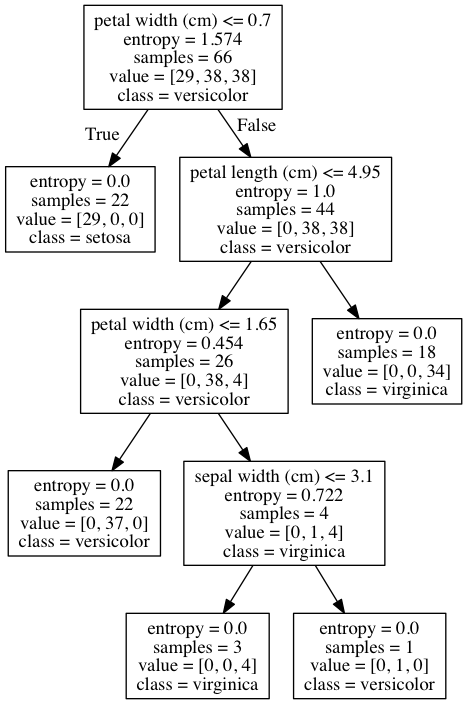

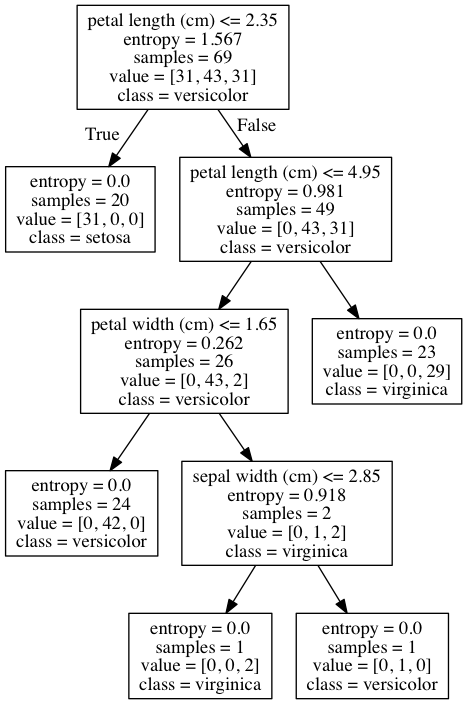

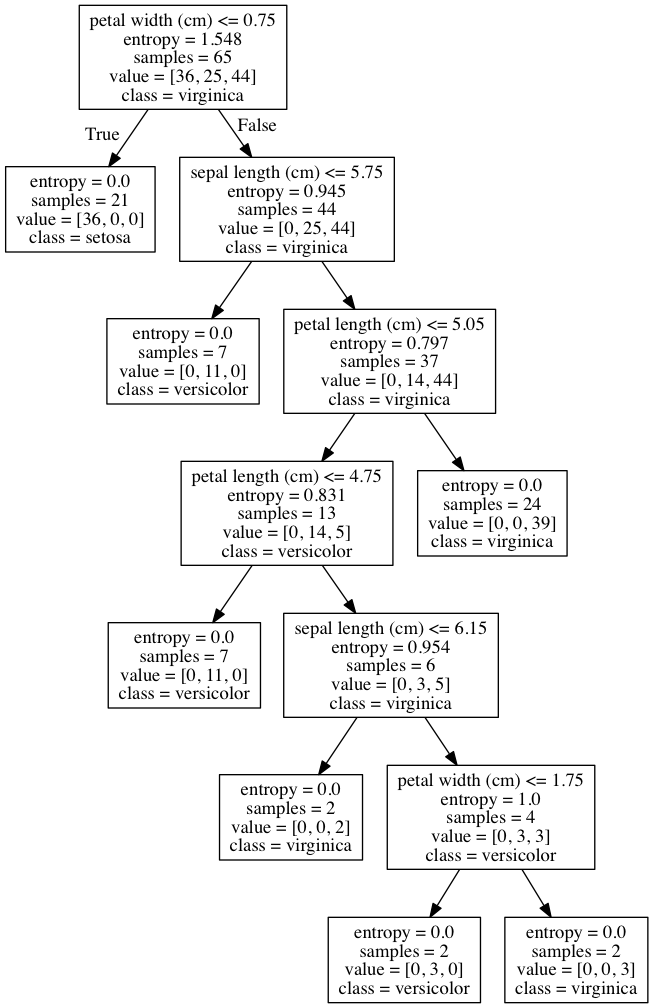

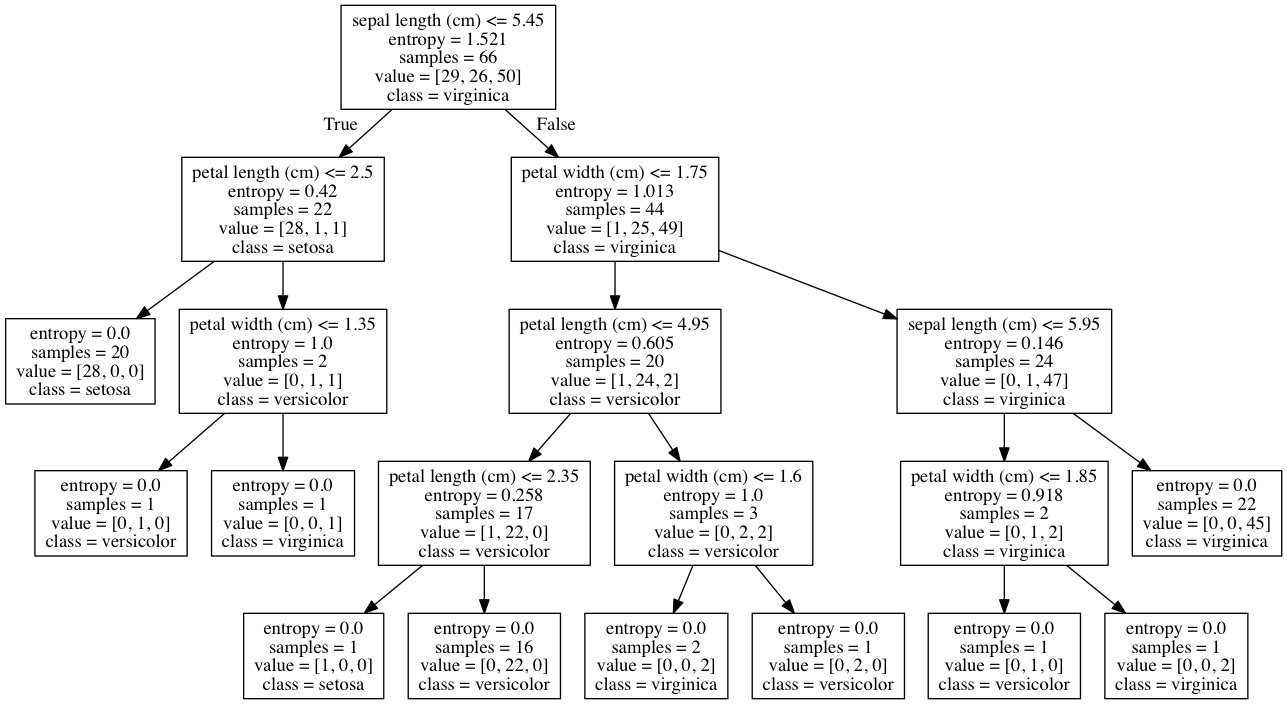

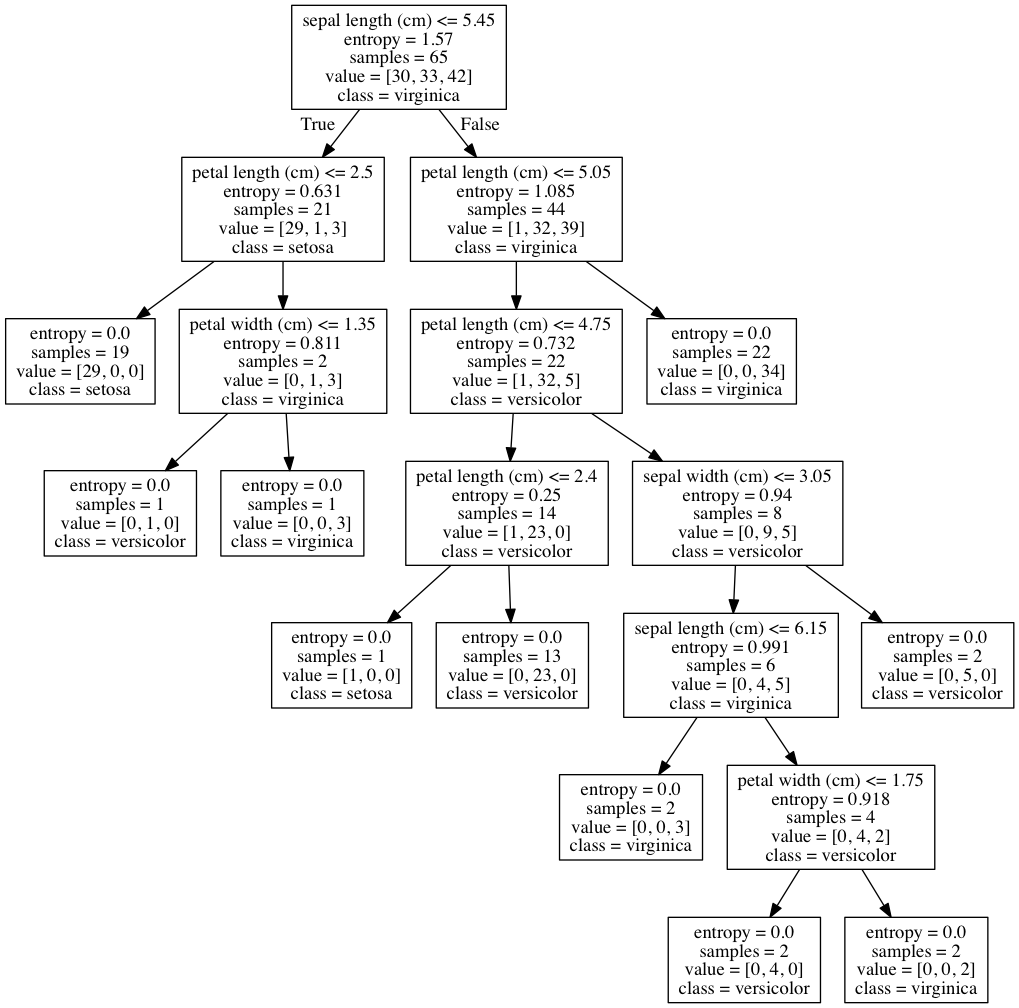

In [6]:
# Visualize
# from scikit decision tree tutorial: http://scikit-learn.org/stable/modules/tree.html
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image
from IPython.display import display

i_tree = 0
for tree_in_forest in forest.estimators_:
    dot_data = StringIO()
    tree.export_graphviz(tree_in_forest, out_file=dot_data, feature_names=feature_names, class_names=target_names)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    image = Image(graph.create_png())
    display(image)
    i_tree = i_tree + 1